## Importando os dados

In [1]:
import pandas as pd
from datetime import datetime, date, time

In [2]:
base = pd.read_excel('C:/Users/alex-/Documents/Data Science/Modelo de Projeção/dataset_vendas.xlsx')

In [3]:
#listando os dados
base.head()

,Data,Semana,Vendas
0,01/01/2022,sábado,189
1,02/01/2022,domingo,85
2,03/01/2022,segunda-feira,7313
3,04/01/2022,terça-feira,4775
4,05/01/2022,quarta-feira,4387


In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    304 non-null    object
 1   Semana  304 non-null    object
 2   Vendas  304 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 7.2+ KB


In [5]:
#convertendo a coluna "Data" que está como object para o tipo datetime

#base['Data'] = base['Data'].astype('datetime64')
base['Data'] = pd.to_datetime(base['Data'], format='%d/%m/%Y')

In [6]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    304 non-null    datetime64[ns]
 1   Semana  304 non-null    object        
 2   Vendas  304 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
#vendo estatística básica
base.describe()

,Vendas
count,304.000000
mean,5631.664474
std,4849.605582
min,0.000000
25%,147.000000
50%,5573.000000
75%,8750.500000
max,19918.000000


In [8]:
#renomeando as colunas para minusculo
base.rename(columns ={"Data":"data",
                             "Semana": "semana",
                             "Vendas":"vendas",
                             "Vendas Projeção":"projeção"},
                     inplace = True)
base.head()

,data,semana,vendas
0,2022-01-01,sábado,189
1,2022-01-02,domingo,85
2,2022-01-03,segunda-feira,7313
3,2022-01-04,terça-feira,4775
4,2022-01-05,quarta-feira,4387


In [9]:
#confirmando o tipo dos dados após as colunas serem renomeadas

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    304 non-null    datetime64[ns]
 1   semana  304 non-null    object        
 2   vendas  304 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
#criando um novo dataframe para analisar as vendas agrupadas por dia da semana
base_semana = base.groupby('semana').sum('vendas')
base_semana

,vendas
semana,
domingo,2190
quarta-feira,243030
quinta-feira,392447
segunda-feira,519679
sexta-feira,279061
sábado,4492
terça-feira,271127


## Ordenando os dados

In [11]:
#criando uma ordenação qualquer, para que eu pudesse criar em seguida uma coluna que eu vou usar na ordenação padrão
base_semana.sort_values(['semana'], ascending=False, inplace=True) #ordenei os dados pelo nome da semana

base_semana["ordenação"] = ["3","7","6","2","5","4","1"] #criei uma nova coluna passando os dados da ordem do dia da semana
base_semana #printando o dataframe

,vendas,ordenação
semana,,
terça-feira,271127,3
sábado,4492,7
sexta-feira,279061,6
segunda-feira,519679,2
quinta-feira,392447,5
quarta-feira,243030,4
domingo,2190,1


In [12]:
#Abaixo ordenei o dataset com minha ordenação da semana, para que começasse no domingo e terminasse no sábado
base_semana.sort_values(by=["ordenação"], ascending=True, inplace=True) #O inplace serve para 
base_semana

,vendas,ordenação
semana,,
domingo,2190,1
segunda-feira,519679,2
terça-feira,271127,3
quarta-feira,243030,4
quinta-feira,392447,5
sexta-feira,279061,6
sábado,4492,7


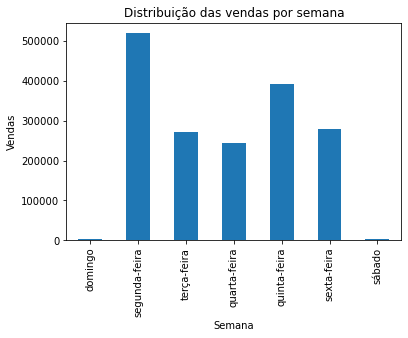

In [13]:
import matplotlib.pyplot as plt


#criando um gráfico de barras para analisar o comportamento das vendas na semana
base_semana['vendas'].plot(kind='bar', 
                           title="Distribuição das vendas por semana",
                           ylabel="Vendas",
                           xlabel="Semana")
plt.show()

#no gráfico abaixo é possível visualizar que temos um tipo de comportamento ao longo da semana

## Visualizando comportamento diário durante todo o período

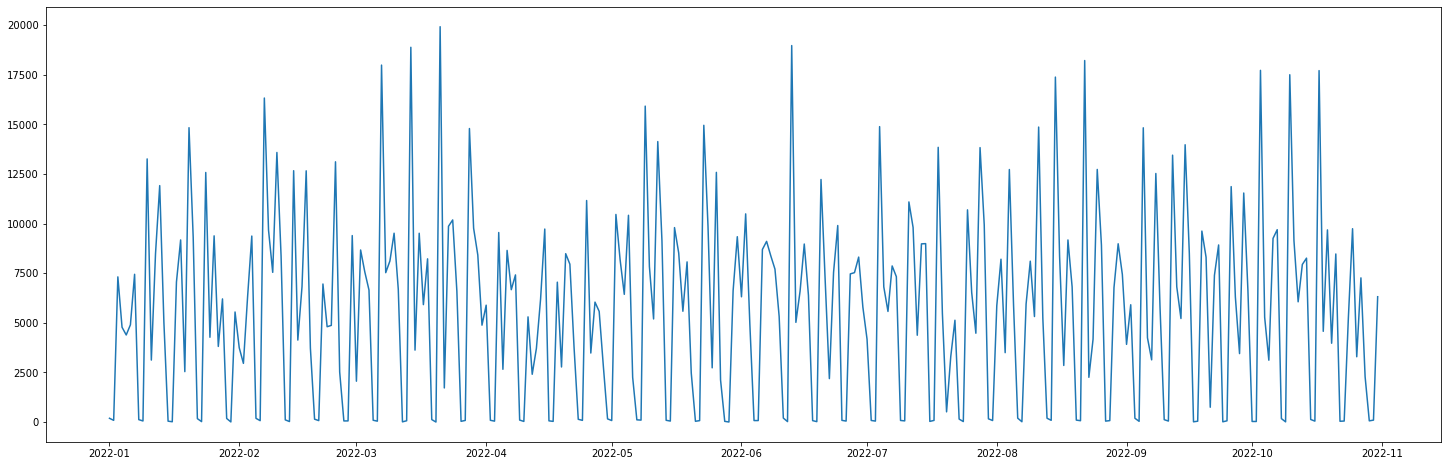

In [47]:
#declarando as variaveis
mes = base['data']
vendas = base['vendas']

plt.figure(figsize=(25,8)) #alterei o tamanho do gráfico
plt.plot(mes,vendas) #incluindo no eixo do gráfico as variáveis criadas e plotando
plt.show()

## Gerando o forecast

In [15]:
#criando um novo dataframe para trabalharmos

base1 = base
base1.head()

,data,semana,vendas
0,2022-01-01,sábado,189
1,2022-01-02,domingo,85
2,2022-01-03,segunda-feira,7313
3,2022-01-04,terça-feira,4775
4,2022-01-05,quarta-feira,4387


In [16]:
#Excluindo a coluna semana do dataframe base1, pois para o modelo de predição não será necessário

base1.drop(columns=['semana'],inplace=True)
base1

,data,vendas
0,2022-01-01,189
1,2022-01-02,85
2,2022-01-03,7313
3,2022-01-04,4775
4,2022-01-05,4387
...,...,...
299,2022-10-27,7263
300,2022-10-28,2283
301,2022-10-29,60
302,2022-10-30,96


In [17]:
#definindo o campo de período como indice do dataframe

base1 = base1.set_index('data')

In [18]:
#importando outras bibliotecas

import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

In [49]:
#definindo o tamanho do gráfico que será apresentado logo abaixo

plt.rcParams["figure.figsize"]=(15,4)

### Função de Autocorrelação (ACF)

[]

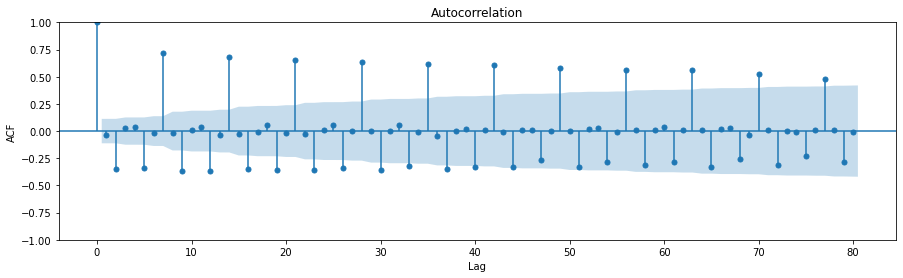

In [20]:
#Aqui é calculado o ACF, que será utilizado no calculo da predição do modelo

plot_acf(base1.values,lags=80)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.plot()

[]

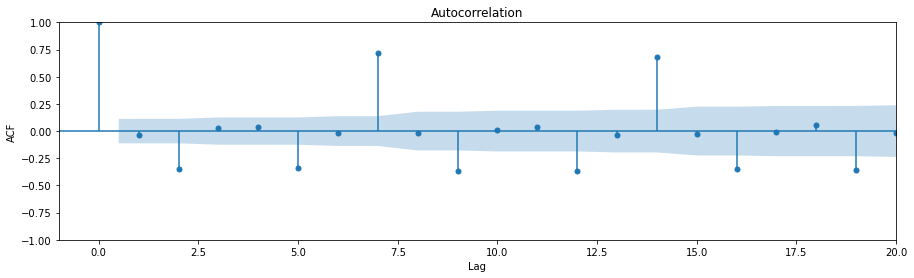

In [21]:
#Aqui foi dado apenas um zoom no ACF calculado acima

plot_acf(base1.values,lags=80)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.xlim([-1,20])
plt.plot()

Encontramos que a lag do ACF tem valor 2

### Autocorrelação Parcial (PACF)

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\alex-\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


[]

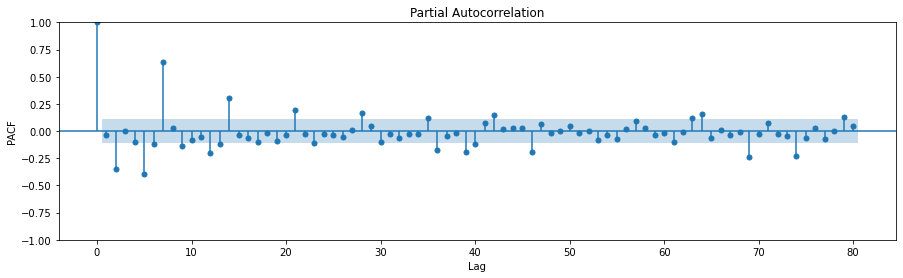

In [23]:
#Aqui é calculado o PACF, que também será utilizado no calculo da predição do modelo

plot_pacf(base1.values,lags=80)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.plot()

C:\Users\alex-\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


[]

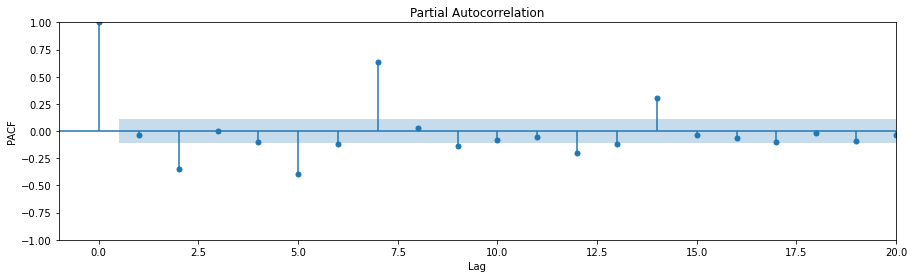

In [24]:
#Aqui foi dado apenas um zoom no PACF calculado acima

plot_pacf(base1.values,lags=80)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.xlim([-1,20])
plt.plot()

Encontramos que a lag do PACF é 2.

Variáveis calculadas pelo ACF e PACF:

O modelo 'p' é 2 

O modelo 'q' é 2.

### Treinando o modelo

In [135]:
#definindo as variáveis e período pra teste do modelo

t_treino = base1[base1.index<'2022-11-01'].index.values
t_teste = base1[base1.index>='2022-05-01'].index.values
x_treino = base1[base1.index<'2022-11-01'].values
x_teste = base1[base1.index>='2022-05-01'].values

In [136]:
#declarando a biblioteca SARIMAX

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [137]:
#Aplicando o modelo de regressão

modelo = SARIMAX(x_treino, order=(2,1,2), seasonal_order=(0,1,1,7))
resultado = modelo.fit()

C:\Users\alex-\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\alex-\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [138]:
#Apresentando os coeficientes

print('Coeficientes: %s' % resultado.params)

Coeficientes: [ 7.04512377e-01  1.28714149e-01 -1.74646290e+00  7.50946710e-01
 -9.00111654e-01  1.36556054e+07]


In [139]:
#Calculando a predição

x_pred = resultado.predict(start=len(x_treino), end=len(x_treino)+len(x_teste)-1)

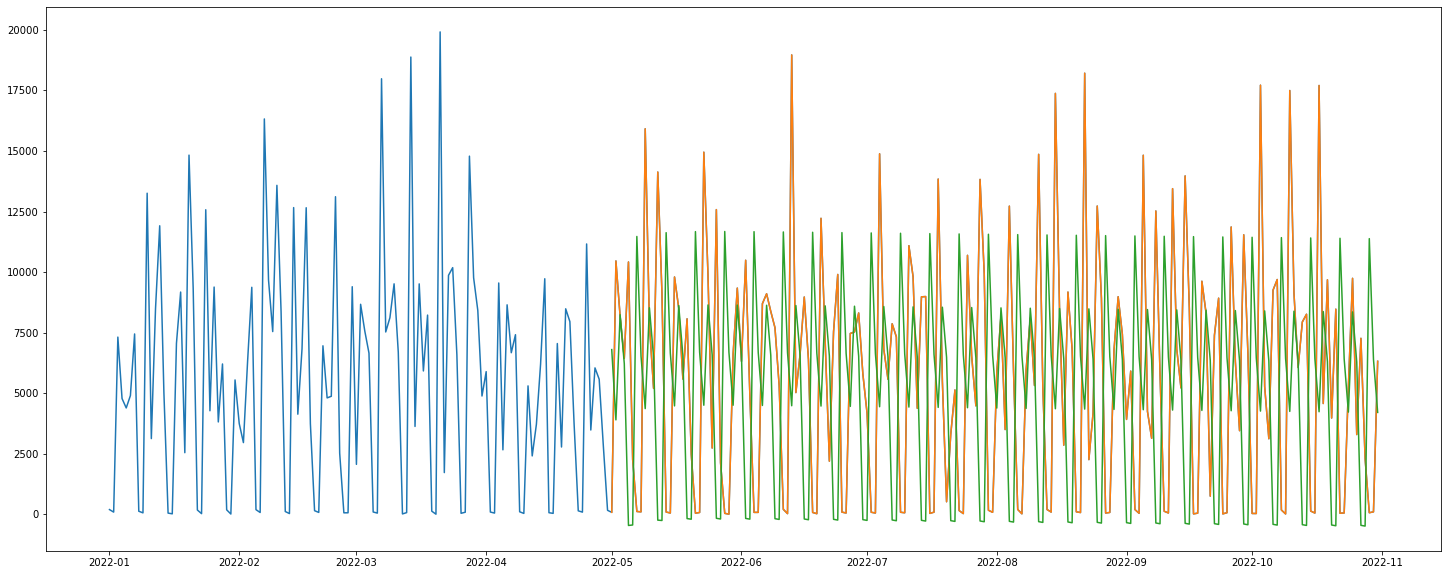

In [141]:
#Plotando no gráfico o realizado + predição

plt.figure(figsize=(25,10))
plt.plot(t_treino, x_treino)
plt.plot(t_teste, x_teste)
plt.plot(t_teste, x_pred)

### Calculando os erros

In [125]:
from sklearn.metrics import mean_squared_error

In [126]:
MSE = mean_squared_error(x_teste, x_pred)

In [127]:
RMSE = np.sqrt(MSE)

In [128]:
print("RMSE = {:0.1f}".format(RMSE))

RMSE = 7774.0


Links de ajuda:

Sobre séries temporais: https://medium.com/techbloghotmart/o-que-s%C3%A3o-s%C3%A9ries-temporais-e-como-aplicar-em-machine-learning-6ea5d94bec78

Criar modelo de previsão de séries temporais: https://medium.com/techbloghotmart/dicas-para-criar-um-modelo-de-previs%C3%A3o-de-s%C3%A9ries-temporais-d4bb2e32e148#:~:text=Basicamente%2C%20o%20ARIMA%20utiliza%20dados,ARMA%20e%20por%20a%C3%AD%20vai.


Criando ACF e PACF: https://www.youtube.com/watch?v=8jZX2CsM-_c&ab_channel=ProfDanilo_DS